In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Item XIV

Show that the following Laurent expansion is valid in $1 < |z| < 2$:
$$
\frac{-1}{(z-1)(z-2)} = \sum_{n=0}^\infty \frac{z^n}{2^{n+1}} + \sum_{n=1}^\infty \frac{1}{z^n} \,,
$$
and draw an sketch of the region. Does it exist an expansion when $|z|>2$? If so, please compute it.

\* **Note**: I had to change the $1$ with $-1$, for the exercise to be correct.

---

We have that:
\begin{align*}
\sum_{n=0}^{\infty} \frac{z^n}{2^{n+1}} &= \frac{1}{2} \sum_{n=0}^{\infty} \frac{z^n}{2^n}
\\ &= \frac{1}{2} \sum_{n=0}^{\infty} \left( z/2 \right)^n
\\ &= \frac{1}{2} \frac{1}{1-z/2} \quad \text{as long as $|z/2|<1$.}
\\ &= \frac{1}{2-z}
\end{align*}
And for the other sum:
\begin{align*}
\sum_{n=1}^{\infty} \frac{1}{z^n}
&= -1 + \sum_{n=0}^{\infty} \frac{1}{z^n}
\\ &= -1 + \sum_{n=0}^{\infty} (1/z)^n
\\ &= -1 + \frac{1}{1-(1/z)} \quad \text{as long as $(|1/z|<1) \Leftrightarrow (z<-1) \vee (z>1)$.}
\\ &= \frac{1}{z-1}
\end{align*}
Adding both results:
\begin{align}
\frac{1}{2-z} + \frac{1}{z-1} &= \frac{-1}{(z-1)(z-2)}
\end{align}

In [56]:
# Function to plot a function
def plot_fun(fn,xi,xf,vectorized=False,n=101,**args):
    xs = np.linspace(xi,xf,num=n)
    if vectorized:
        ys = fn(xs)
    else:
        ys = [fn(x) for x in xs]
    plt.plot(xs,ys,'-',**args)

In [57]:
# The sums, limiting n:
def sums(z,n_max):
    ns = np.arange(n_max+1)
    sum1 = np.sum(z**ns/2**(ns+1))
    sum2 = np.sum(1/z**ns[1:])
    return sum1+sum2

/home/fcasas/Music/p36cpu/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


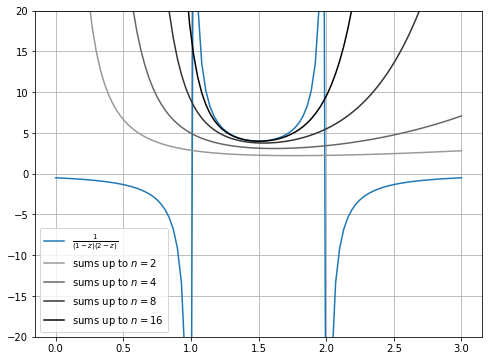

In [58]:
# We plot the region
plt.figure(figsize=(8,6))
plot_fun(lambda x: -1/((x-1)*(x-2)),0,3,vectorized=True,label="$\\frac{1}{(1-z)(2-z)}$")
plot_fun(lambda x: sums(x,2),0,3,label="sums up to $n=2$",c=(.6,.6,.6))
plot_fun(lambda x: sums(x,4),0,3,label="sums up to $n=4$",c=(.4,.4,.4))
plot_fun(lambda x: sums(x,8),0,3,label="sums up to $n=8$",c=(.2,.2,.2))
plot_fun(lambda x: sums(x,16),0,3,label="sums up to $n=16$",c=(.0,.0,.0))
plt.ylim((-20,20))
plt.legend()
plt.grid()
plt.show()

We can see that it converges in $1<|z|<2$ as $n \rightarrow \infty$.

---

We can get the Laurent expansion of the series when $|z|>2$, if we make use of:
$$
\frac{1}{1-z} = \sum_{n=1}^\infty \frac{1}{z^n} \quad \text{if $|z|>1$} \,.
$$
We proceed:
\begin{align*}
\frac{1}{(z-1)(z-2)} &= \frac{1}{2-z} + \frac{1}{z-1}
\\ &= \frac{1}{2} \cdot \frac{1}{1-\frac{z}{2}} - 1 \cdot \frac{1}{1-z}
\\ &= \frac{-1}{2} \sum_{n=1}^\infty \frac{1}{(z/2)^n} + 1 \sum_{n=1}^\infty \frac{1}{z^n}
\\ &= \frac{-1}{2} \sum_{n=1}^\infty \frac{2^n}{z^n} + 1 \sum_{n=1}^\infty \frac{1}{z^n}
\end{align*}


In [59]:
# The new sums, limiting n:
def sums2(z,n_max):
    ns = np.arange(n_max+1)
    sum1 = -0.5*np.sum(2**ns[1:]/z**ns[1:])
    sum2 = np.sum(1/z**ns[1:])
    return sum1+sum2

/home/fcasas/Music/p36cpu/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/fcasas/Music/p36cpu/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/fcasas/Music/p36cpu/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


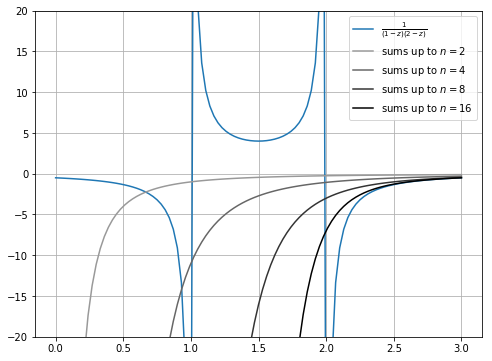

In [60]:
# We plot the region, again
plt.figure(figsize=(8,6))
plot_fun(lambda x: -1/((x-1)*(x-2)),0,3,vectorized=True,label="$\\frac{1}{(1-z)(2-z)}$")
plot_fun(lambda x: sums2(x,2),0,3,label="sums up to $n=2$",c=(.6,.6,.6))
plot_fun(lambda x: sums2(x,4),0,3,label="sums up to $n=4$",c=(.4,.4,.4))
plot_fun(lambda x: sums2(x,8),0,3,label="sums up to $n=8$",c=(.2,.2,.2))
plot_fun(lambda x: sums2(x,16),0,3,label="sums up to $n=16$",c=(.0,.0,.0))
plt.ylim((-20,20))
plt.legend()
plt.grid()
plt.show()

We can see that it converges to the function when $|z|>2$ as $n \rightarrow \infty$.

## References
* http://sym.lboro.ac.uk/resources/Handout-Laurent.pdf